[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/10_Advanced_Optimization_Algorithms_Regression.ipynb)

# 10 Comparison of Different Advanced Optimization Algorithms Using Regression


In [1]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv

--2018-06-20 12:53:27--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14378532 (14M) [text/plain]
Saving to: ‘FFS_01433.csv’

FFS_01433.csv       100%[===================>]  13.71M  --.-KB/s    in 0.09s   

2018-06-20 12:53:27 (161 MB/s) - ‘FFS_01433.csv’ saved [14378532/14378532]



In [2]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [5]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


In [7]:
df = rawdf.copy()

#feature scale
ss = MinMaxScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [8]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,0.84,1.00,0.27,0.11,0.21,0.32,0.92,0.53,0.47,0.52,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
1,0.37,0.64,0.55,0.13,0.37,0.85,0.69,0.00,0.11,0.09,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
2,0.37,0.64,0.55,0.13,0.37,0.85,0.69,0.00,0.11,0.09,...,0.55,0.33,0.19,0.11,0.31,0.78,0.49,0.51,0.18,0.00
3,0.76,0.42,0.00,0.31,0.32,0.22,0.78,0.54,0.45,0.35,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
4,0.76,0.42,0.00,0.31,0.32,0.22,0.78,0.54,0.45,0.35,...,0.57,0.39,1.00,0.16,1.00,0.58,0.70,0.00,0.79,0.00


In [9]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


##  Building the Neural Network

In [12]:
epochs = 100
batch_size = 256

In [13]:
def model(optimizer):
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  
  model.compile(loss='mse',
               optimizer=optimizer,metrics=['mae'])
  
  return model

### 3.1 Optimizer = vanilla SGD with learning rate = 0.01




In [14]:
vanilla_sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0, nesterov=False)

In [15]:
start = time.time()
model_1 = model(vanilla_sgd)
model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.0557 - mean_absolute_error: 0.1874 - val_loss: 0.0284 - val_mean_absolute_error: 0.1379
Epoch 2/100
 - 1s - loss: 0.0265 - mean_absolute_error: 0.1328 - val_loss: 0.0260 - val_mean_absolute_error: 0.1314
Epoch 3/100
 - 1s - loss: 0.0248 - mean_absolute_error: 0.1280 - val_loss: 0.0248 - val_mean_absolute_error: 0.1279
Epoch 4/100
 - 1s - loss: 0.0238 - mean_absolute_error: 0.1249 - val_loss: 0.0239 - val_mean_absolute_error: 0.1250
Epoch 5/100
 - 1s - loss: 0.0230 - mean_absolute_error: 0.1224 - val_loss: 0.0231 - val_mean_absolute_error: 0.1227
Epoch 6/100
 - 1s - loss: 0.0223 - mean_absolute_error: 0.1203 - val_loss: 0.0225 - val_mean_absolute_error: 0.1208
Epoch 7/100
 - 1s - loss: 0.0217 - mean_absolute_error: 0.1185 - val_loss: 0.0219 - val_mean_absolute_error: 0.1192
Epoch 8/100
 - 1s - loss: 0.0212 - mean_absolute_error: 0.1170 - val_loss: 0.0215 - val_mean_absolute_error: 0.1178
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0169 - mean_absolute_error: 0.1040 - val_loss: 0.0174 - val_mean_absolute_error: 0.1053
Epoch 30/100
 - 1s - loss: 0.0168 - mean_absolute_error: 0.1038 - val_loss: 0.0173 - val_mean_absolute_error: 0.1051
Epoch 31/100
 - 1s - loss: 0.0167 - mean_absolute_error: 0.1036 - val_loss: 0.0172 - val_mean_absolute_error: 0.1048
Epoch 32/100
 - 1s - loss: 0.0166 - mean_absolute_error: 0.1033 - val_loss: 0.0171 - val_mean_absolute_error: 0.1046
Epoch 33/100
 - 1s - loss: 0.0166 - mean_absolute_error: 0.1031 - val_loss: 0.0170 - val_mean_absolute_error: 0.1043
Epoch 34/100
 - 1s - loss: 0.0165 - mean_absolute_error: 0.1029 - val_loss: 0.0170 - val_mean_absolute_error: 0.1041
Epoch 35/100
 - 1s - loss: 0.0164 - mean_absolute_error: 0.1027 - val_loss: 0.0169 - val_mean_absolute_error: 0.1041
Epoch 36/100
 - 1s - loss: 0.0163 - mean_absolute_error: 0.1025 - val_loss: 0.0168 - val_mean_absolute_error: 0.1038
Epoch 37/100
 - 1s - loss: 0.0163 - mean_absolute_error: 0.1023 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0153 - mean_absolute_error: 0.0992 - val_loss: 0.0157 - val_mean_absolute_error: 0.1003
Epoch 59/100
 - 1s - loss: 0.0152 - mean_absolute_error: 0.0990 - val_loss: 0.0157 - val_mean_absolute_error: 0.1002
Epoch 60/100
 - 1s - loss: 0.0152 - mean_absolute_error: 0.0989 - val_loss: 0.0157 - val_mean_absolute_error: 0.1001
Epoch 61/100
 - 1s - loss: 0.0152 - mean_absolute_error: 0.0988 - val_loss: 0.0156 - val_mean_absolute_error: 0.0999
Epoch 62/100
 - 1s - loss: 0.0151 - mean_absolute_error: 0.0987 - val_loss: 0.0156 - val_mean_absolute_error: 0.0998
Epoch 63/100
 - 1s - loss: 0.0151 - mean_absolute_error: 0.0986 - val_loss: 0.0156 - val_mean_absolute_error: 0.0997
Epoch 64/100
 - 1s - loss: 0.0150 - mean_absolute_error: 0.0984 - val_loss: 0.0155 - val_mean_absolute_error: 0.0996
Epoch 65/100
 - 1s - loss: 0.0150 - mean_absolute_error: 0.0983 - val_loss: 0.0155 - val_mean_absolute_error: 0.0995
Epoch 66/100
 - 1s - loss: 0.0150 - mean_absolute_error: 0.0982 

Epoch 87/100
 - 1s - loss: 0.0144 - mean_absolute_error: 0.0962 - val_loss: 0.0148 - val_mean_absolute_error: 0.0974
Epoch 88/100
 - 1s - loss: 0.0143 - mean_absolute_error: 0.0961 - val_loss: 0.0148 - val_mean_absolute_error: 0.0973
Epoch 89/100
 - 1s - loss: 0.0143 - mean_absolute_error: 0.0961 - val_loss: 0.0147 - val_mean_absolute_error: 0.0972
Epoch 90/100
 - 1s - loss: 0.0143 - mean_absolute_error: 0.0960 - val_loss: 0.0147 - val_mean_absolute_error: 0.0971
Epoch 91/100
 - 1s - loss: 0.0143 - mean_absolute_error: 0.0959 - val_loss: 0.0147 - val_mean_absolute_error: 0.0972
Epoch 92/100
 - 1s - loss: 0.0143 - mean_absolute_error: 0.0959 - val_loss: 0.0147 - val_mean_absolute_error: 0.0970
Epoch 93/100
 - 1s - loss: 0.0142 - mean_absolute_error: 0.0958 - val_loss: 0.0147 - val_mean_absolute_error: 0.0969
Epoch 94/100
 - 1s - loss: 0.0142 - mean_absolute_error: 0.0957 - val_loss: 0.0146 - val_mean_absolute_error: 0.0968
Epoch 95/100
 - 1s - loss: 0.0142 - mean_absolute_error: 0.0956 

In [37]:
train_loss_1 = model_1.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_1))
test_loss_1 = model_1.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_1))
y_pred_1 = model_1.predict(X_test)
print("Score", r2_score(y_test, y_pred_1))

Training loss  0.014163717018659658
Testing loss 0.014726039226638139
Score 0.5310713293615809


### 3.2 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9

In [16]:
sgd_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)

In [17]:
start = time.time()
model_2 = model(sgd_momentum)
model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.0323 - mean_absolute_error: 0.1441 - val_loss: 0.0243 - val_mean_absolute_error: 0.1269
Epoch 2/100
 - 1s - loss: 0.0219 - mean_absolute_error: 0.1193 - val_loss: 0.0203 - val_mean_absolute_error: 0.1146
Epoch 3/100
 - 1s - loss: 0.0192 - mean_absolute_error: 0.1110 - val_loss: 0.0185 - val_mean_absolute_error: 0.1089
Epoch 4/100
 - 1s - loss: 0.0176 - mean_absolute_error: 0.1062 - val_loss: 0.0171 - val_mean_absolute_error: 0.1048
Epoch 5/100
 - 1s - loss: 0.0165 - mean_absolute_error: 0.1028 - val_loss: 0.0162 - val_mean_absolute_error: 0.1018
Epoch 6/100
 - 1s - loss: 0.0158 - mean_absolute_error: 0.1007 - val_loss: 0.0157 - val_mean_absolute_error: 0.1000
Epoch 7/100
 - 1s - loss: 0.0154 - mean_absolute_error: 0.0991 - val_loss: 0.0153 - val_mean_absolute_error: 0.0987
Epoch 8/100
 - 1s - loss: 0.0151 - mean_absolute_error: 0.0982 - val_loss: 0.0150 - val_mean_absolute_error: 0.0977
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0131 - mean_absolute_error: 0.0918 - val_loss: 0.0133 - val_mean_absolute_error: 0.0921
Epoch 30/100
 - 1s - loss: 0.0131 - mean_absolute_error: 0.0916 - val_loss: 0.0132 - val_mean_absolute_error: 0.0917
Epoch 31/100
 - 1s - loss: 0.0131 - mean_absolute_error: 0.0915 - val_loss: 0.0131 - val_mean_absolute_error: 0.0914
Epoch 32/100
 - 1s - loss: 0.0129 - mean_absolute_error: 0.0911 - val_loss: 0.0131 - val_mean_absolute_error: 0.0913
Epoch 33/100
 - 1s - loss: 0.0129 - mean_absolute_error: 0.0908 - val_loss: 0.0130 - val_mean_absolute_error: 0.0910
Epoch 34/100
 - 1s - loss: 0.0128 - mean_absolute_error: 0.0906 - val_loss: 0.0130 - val_mean_absolute_error: 0.0909
Epoch 35/100
 - 1s - loss: 0.0128 - mean_absolute_error: 0.0904 - val_loss: 0.0129 - val_mean_absolute_error: 0.0907
Epoch 36/100
 - 1s - loss: 0.0127 - mean_absolute_error: 0.0901 - val_loss: 0.0128 - val_mean_absolute_error: 0.0903
Epoch 37/100
 - 1s - loss: 0.0126 - mean_absolute_error: 0.0899 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0119 - val_mean_absolute_error: 0.0870
Epoch 59/100
 - 1s - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0118 - val_mean_absolute_error: 0.0870
Epoch 60/100
 - 1s - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0120 - val_mean_absolute_error: 0.0869
Epoch 61/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0858 - val_loss: 0.0120 - val_mean_absolute_error: 0.0868
Epoch 62/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0858 - val_loss: 0.0121 - val_mean_absolute_error: 0.0871
Epoch 63/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0117 - val_mean_absolute_error: 0.0862
Epoch 64/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0855 - val_loss: 0.0117 - val_mean_absolute_error: 0.0866
Epoch 65/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0853 - val_loss: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 66/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0852 

Epoch 87/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0835 - val_loss: 0.0111 - val_mean_absolute_error: 0.0842
Epoch 88/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0834 - val_loss: 0.0112 - val_mean_absolute_error: 0.0840
Epoch 89/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0833 - val_loss: 0.0111 - val_mean_absolute_error: 0.0842
Epoch 90/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0830 - val_loss: 0.0111 - val_mean_absolute_error: 0.0844
Epoch 91/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0832 - val_loss: 0.0112 - val_mean_absolute_error: 0.0847
Epoch 92/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0829 - val_loss: 0.0111 - val_mean_absolute_error: 0.0840
Epoch 93/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0829 - val_loss: 0.0111 - val_mean_absolute_error: 0.0840
Epoch 94/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0829 - val_loss: 0.0112 - val_mean_absolute_error: 0.0849
Epoch 95/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0829 

In [38]:
train_loss_2 = model_2.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_2))
test_loss_2 = model_2.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_2))
y_pred_2 = model_2.predict(X_test)
print("Score", r2_score(y_test, y_pred_2))

Training loss  0.010677915846100637
Testing loss 0.011290660469347952
Score 0.6404658235934


### 3.3 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9, NAG=true

In [18]:
NAG_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)

In [19]:
start = time.time()
model_3 = model(NAG_momentum)
model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.0265 - mean_absolute_error: 0.1295 - val_loss: 0.0200 - val_mean_absolute_error: 0.1135
Epoch 2/100
 - 1s - loss: 0.0183 - mean_absolute_error: 0.1083 - val_loss: 0.0176 - val_mean_absolute_error: 0.1055
Epoch 3/100
 - 1s - loss: 0.0165 - mean_absolute_error: 0.1027 - val_loss: 0.0161 - val_mean_absolute_error: 0.1011
Epoch 4/100
 - 1s - loss: 0.0157 - mean_absolute_error: 0.1000 - val_loss: 0.0154 - val_mean_absolute_error: 0.0991
Epoch 5/100
 - 1s - loss: 0.0152 - mean_absolute_error: 0.0985 - val_loss: 0.0151 - val_mean_absolute_error: 0.0980
Epoch 6/100
 - 1s - loss: 0.0149 - mean_absolute_error: 0.0976 - val_loss: 0.0148 - val_mean_absolute_error: 0.0973
Epoch 7/100
 - 1s - loss: 0.0147 - mean_absolute_error: 0.0970 - val_loss: 0.0147 - val_mean_absolute_error: 0.0967
Epoch 8/100
 - 1s - loss: 0.0146 - mean_absolute_error: 0.0964 - val_loss: 0.0147 - val_mean_absolute_error: 0.0967
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0129 - mean_absolute_error: 0.0906 - val_loss: 0.0130 - val_mean_absolute_error: 0.0911
Epoch 30/100
 - 1s - loss: 0.0128 - mean_absolute_error: 0.0905 - val_loss: 0.0138 - val_mean_absolute_error: 0.0948
Epoch 31/100
 - 1s - loss: 0.0128 - mean_absolute_error: 0.0903 - val_loss: 0.0129 - val_mean_absolute_error: 0.0909
Epoch 32/100
 - 1s - loss: 0.0127 - mean_absolute_error: 0.0902 - val_loss: 0.0129 - val_mean_absolute_error: 0.0914
Epoch 33/100
 - 1s - loss: 0.0127 - mean_absolute_error: 0.0899 - val_loss: 0.0130 - val_mean_absolute_error: 0.0910
Epoch 34/100
 - 1s - loss: 0.0126 - mean_absolute_error: 0.0897 - val_loss: 0.0128 - val_mean_absolute_error: 0.0904
Epoch 35/100
 - 1s - loss: 0.0126 - mean_absolute_error: 0.0897 - val_loss: 0.0127 - val_mean_absolute_error: 0.0902
Epoch 36/100
 - 1s - loss: 0.0125 - mean_absolute_error: 0.0894 - val_loss: 0.0127 - val_mean_absolute_error: 0.0900
Epoch 37/100
 - 1s - loss: 0.0125 - mean_absolute_error: 0.0893 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0117 - mean_absolute_error: 0.0864 - val_loss: 0.0120 - val_mean_absolute_error: 0.0882
Epoch 59/100
 - 1s - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0119 - val_mean_absolute_error: 0.0877
Epoch 60/100
 - 1s - loss: 0.0116 - mean_absolute_error: 0.0862 - val_loss: 0.0120 - val_mean_absolute_error: 0.0883
Epoch 61/100
 - 1s - loss: 0.0116 - mean_absolute_error: 0.0861 - val_loss: 0.0119 - val_mean_absolute_error: 0.0874
Epoch 62/100
 - 1s - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0119 - val_mean_absolute_error: 0.0875
Epoch 63/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0858 - val_loss: 0.0119 - val_mean_absolute_error: 0.0877
Epoch 64/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0858 - val_loss: 0.0123 - val_mean_absolute_error: 0.0880
Epoch 65/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0119 - val_mean_absolute_error: 0.0879
Epoch 66/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0855 

Epoch 87/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0837 - val_loss: 0.0114 - val_mean_absolute_error: 0.0857
Epoch 88/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0837 - val_loss: 0.0114 - val_mean_absolute_error: 0.0858
Epoch 89/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0836 - val_loss: 0.0116 - val_mean_absolute_error: 0.0869
Epoch 90/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0836 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 91/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0835 - val_loss: 0.0118 - val_mean_absolute_error: 0.0859
Epoch 92/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0834 - val_loss: 0.0117 - val_mean_absolute_error: 0.0875
Epoch 93/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0834 - val_loss: 0.0114 - val_mean_absolute_error: 0.0850
Epoch 94/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0833 - val_loss: 0.0113 - val_mean_absolute_error: 0.0850
Epoch 95/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0833 

In [39]:
train_loss_3 = model_3.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_3))
test_loss_3 = model_3.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_3))
y_pred_3 = model_3.predict(X_test)
print("Score", r2_score(y_test, y_pred_3))

Training loss  0.010828997954291745
Testing loss 0.011395091433073308
Score 0.6371403755039443


### 3.4 Optimizer = AdaGrad learning rate = 0.01



In [20]:
Adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0)

In [21]:
start = time.time()
model_4 = model(Adagrad)
model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.0234 - mean_absolute_error: 0.1175 - val_loss: 0.0163 - val_mean_absolute_error: 0.1021
Epoch 2/100
 - 1s - loss: 0.0154 - mean_absolute_error: 0.0993 - val_loss: 0.0148 - val_mean_absolute_error: 0.0969
Epoch 3/100
 - 1s - loss: 0.0145 - mean_absolute_error: 0.0964 - val_loss: 0.0142 - val_mean_absolute_error: 0.0952
Epoch 4/100
 - 1s - loss: 0.0138 - mean_absolute_error: 0.0941 - val_loss: 0.0137 - val_mean_absolute_error: 0.0933
Epoch 5/100
 - 1s - loss: 0.0134 - mean_absolute_error: 0.0930 - val_loss: 0.0134 - val_mean_absolute_error: 0.0922
Epoch 6/100
 - 1s - loss: 0.0131 - mean_absolute_error: 0.0917 - val_loss: 0.0133 - val_mean_absolute_error: 0.0917
Epoch 7/100
 - 1s - loss: 0.0127 - mean_absolute_error: 0.0904 - val_loss: 0.0143 - val_mean_absolute_error: 0.0968
Epoch 8/100
 - 1s - loss: 0.0125 - mean_absolute_error: 0.0897 - val_loss: 0.0127 - val_mean_absolute_error: 0.0902
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0104 - mean_absolute_error: 0.0813 - val_loss: 0.0119 - val_mean_absolute_error: 0.0854
Epoch 30/100
 - 1s - loss: 0.0104 - mean_absolute_error: 0.0812 - val_loss: 0.0118 - val_mean_absolute_error: 0.0850
Epoch 31/100
 - 1s - loss: 0.0103 - mean_absolute_error: 0.0807 - val_loss: 0.0112 - val_mean_absolute_error: 0.0844
Epoch 32/100
 - 1s - loss: 0.0103 - mean_absolute_error: 0.0806 - val_loss: 0.0109 - val_mean_absolute_error: 0.0837
Epoch 33/100
 - 1s - loss: 0.0102 - mean_absolute_error: 0.0804 - val_loss: 0.0108 - val_mean_absolute_error: 0.0826
Epoch 34/100
 - 1s - loss: 0.0102 - mean_absolute_error: 0.0802 - val_loss: 0.0108 - val_mean_absolute_error: 0.0819
Epoch 35/100
 - 1s - loss: 0.0101 - mean_absolute_error: 0.0800 - val_loss: 0.0112 - val_mean_absolute_error: 0.0830
Epoch 36/100
 - 1s - loss: 0.0101 - mean_absolute_error: 0.0798 - val_loss: 0.0108 - val_mean_absolute_error: 0.0831
Epoch 37/100
 - 1s - loss: 0.0101 - mean_absolute_error: 0.0797 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0095 - mean_absolute_error: 0.0772 - val_loss: 0.0101 - val_mean_absolute_error: 0.0798
Epoch 59/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0771 - val_loss: 0.0102 - val_mean_absolute_error: 0.0806
Epoch 60/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0770 - val_loss: 0.0101 - val_mean_absolute_error: 0.0798
Epoch 61/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0768 - val_loss: 0.0102 - val_mean_absolute_error: 0.0796
Epoch 62/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0768 - val_loss: 0.0102 - val_mean_absolute_error: 0.0794
Epoch 63/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0768 - val_loss: 0.0102 - val_mean_absolute_error: 0.0803
Epoch 64/100
 - 1s - loss: 0.0093 - mean_absolute_error: 0.0766 - val_loss: 0.0102 - val_mean_absolute_error: 0.0794
Epoch 65/100
 - 1s - loss: 0.0093 - mean_absolute_error: 0.0766 - val_loss: 0.0101 - val_mean_absolute_error: 0.0804
Epoch 66/100
 - 1s - loss: 0.0093 - mean_absolute_error: 0.0766 

Epoch 87/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0752 - val_loss: 0.0101 - val_mean_absolute_error: 0.0808
Epoch 88/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0751 - val_loss: 0.0108 - val_mean_absolute_error: 0.0841
Epoch 89/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0752 - val_loss: 0.0098 - val_mean_absolute_error: 0.0784
Epoch 90/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0750 - val_loss: 0.0099 - val_mean_absolute_error: 0.0795
Epoch 91/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0750 - val_loss: 0.0098 - val_mean_absolute_error: 0.0784
Epoch 92/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0750 - val_loss: 0.0098 - val_mean_absolute_error: 0.0780
Epoch 93/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0749 - val_loss: 0.0098 - val_mean_absolute_error: 0.0783
Epoch 94/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0748 - val_loss: 0.0100 - val_mean_absolute_error: 0.0804
Epoch 95/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0748 

In [40]:
train_loss_4 = model_4.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_4))
test_loss_4 = model_4.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_4))
y_pred_4 = model_4.predict(X_test)
print("Score",r2_score(y_test, y_pred_4))

Training loss  0.009002678238787311
Testing loss 0.009948516179971202
Score 0.683204398184736


### 3.5 Optimizer = RMSprop lr=0.001, rho=0.9

In [22]:
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [23]:
start = time.time()
model_5 = model(RMSprop)
model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.0226 - mean_absolute_error: 0.1198 - val_loss: 0.0166 - val_mean_absolute_error: 0.1029
Epoch 2/100
 - 1s - loss: 0.0168 - mean_absolute_error: 0.1040 - val_loss: 0.0235 - val_mean_absolute_error: 0.1227
Epoch 3/100
 - 1s - loss: 0.0156 - mean_absolute_error: 0.0997 - val_loss: 0.0184 - val_mean_absolute_error: 0.1114
Epoch 4/100
 - 1s - loss: 0.0147 - mean_absolute_error: 0.0970 - val_loss: 0.0149 - val_mean_absolute_error: 0.0962
Epoch 5/100
 - 1s - loss: 0.0139 - mean_absolute_error: 0.0942 - val_loss: 0.0148 - val_mean_absolute_error: 0.0993
Epoch 6/100
 - 1s - loss: 0.0135 - mean_absolute_error: 0.0925 - val_loss: 0.0129 - val_mean_absolute_error: 0.0896
Epoch 7/100
 - 1s - loss: 0.0130 - mean_absolute_error: 0.0909 - val_loss: 0.0119 - val_mean_absolute_error: 0.0881
Epoch 8/100
 - 1s - loss: 0.0125 - mean_absolute_error: 0.0892 - val_loss: 0.0146 - val_mean_absolute_error: 0.0948
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0094 - mean_absolute_error: 0.0760 - val_loss: 0.0097 - val_mean_absolute_error: 0.0786
Epoch 30/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0753 - val_loss: 0.0096 - val_mean_absolute_error: 0.0772
Epoch 31/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0752 - val_loss: 0.0093 - val_mean_absolute_error: 0.0750
Epoch 32/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0751 - val_loss: 0.0094 - val_mean_absolute_error: 0.0756
Epoch 33/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0744 - val_loss: 0.0096 - val_mean_absolute_error: 0.0783
Epoch 34/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0744 - val_loss: 0.0093 - val_mean_absolute_error: 0.0765
Epoch 35/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0740 - val_loss: 0.0091 - val_mean_absolute_error: 0.0751
Epoch 36/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0737 - val_loss: 0.0099 - val_mean_absolute_error: 0.0768
Epoch 37/100
 - 1s - loss: 0.0088 - mean_absolute_error: 0.0734 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0079 - mean_absolute_error: 0.0690 - val_loss: 0.0092 - val_mean_absolute_error: 0.0742
Epoch 59/100
 - 1s - loss: 0.0079 - mean_absolute_error: 0.0691 - val_loss: 0.0090 - val_mean_absolute_error: 0.0737
Epoch 60/100
 - 1s - loss: 0.0078 - mean_absolute_error: 0.0689 - val_loss: 0.0107 - val_mean_absolute_error: 0.0803
Epoch 61/100
 - 1s - loss: 0.0078 - mean_absolute_error: 0.0687 - val_loss: 0.0094 - val_mean_absolute_error: 0.0747
Epoch 62/100
 - 1s - loss: 0.0078 - mean_absolute_error: 0.0687 - val_loss: 0.0092 - val_mean_absolute_error: 0.0756
Epoch 63/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0684 - val_loss: 0.0091 - val_mean_absolute_error: 0.0740
Epoch 64/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0683 - val_loss: 0.0107 - val_mean_absolute_error: 0.0785
Epoch 65/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0680 - val_loss: 0.0087 - val_mean_absolute_error: 0.0721
Epoch 66/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0679 

Epoch 87/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0655 - val_loss: 0.0090 - val_mean_absolute_error: 0.0735
Epoch 88/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0659 - val_loss: 0.0118 - val_mean_absolute_error: 0.0835
Epoch 89/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0658 - val_loss: 0.0087 - val_mean_absolute_error: 0.0731
Epoch 90/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0653 - val_loss: 0.0103 - val_mean_absolute_error: 0.0769
Epoch 91/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0654 - val_loss: 0.0089 - val_mean_absolute_error: 0.0725
Epoch 92/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0655 - val_loss: 0.0087 - val_mean_absolute_error: 0.0716
Epoch 93/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0653 - val_loss: 0.0088 - val_mean_absolute_error: 0.0725
Epoch 94/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0652 - val_loss: 0.0115 - val_mean_absolute_error: 0.0819
Epoch 95/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0650 

In [41]:
train_loss_5 = model_5.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_5))
test_loss_5 = model_5.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_5))
y_pred_5 = model_5.predict(X_test)
print("Score",r2_score(y_test, y_pred_5))

Training loss  0.007030418047575678
Testing loss 0.008635457217487475
Score 0.7250167945353492


### 3.6 Optimizer = Adam lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False

In [24]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [25]:
start = time.time()
model_6 = model(Adam)
model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 1s - loss: 0.0176 - mean_absolute_error: 0.1058 - val_loss: 0.0146 - val_mean_absolute_error: 0.0968
Epoch 2/100
 - 1s - loss: 0.0137 - mean_absolute_error: 0.0936 - val_loss: 0.0139 - val_mean_absolute_error: 0.0936
Epoch 3/100
 - 1s - loss: 0.0127 - mean_absolute_error: 0.0901 - val_loss: 0.0124 - val_mean_absolute_error: 0.0901
Epoch 4/100
 - 1s - loss: 0.0121 - mean_absolute_error: 0.0881 - val_loss: 0.0125 - val_mean_absolute_error: 0.0890
Epoch 5/100
 - 1s - loss: 0.0117 - mean_absolute_error: 0.0865 - val_loss: 0.0119 - val_mean_absolute_error: 0.0877
Epoch 6/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0852 - val_loss: 0.0117 - val_mean_absolute_error: 0.0867
Epoch 7/100
 - 1s - loss: 0.0111 - mean_absolute_error: 0.0840 - val_loss: 0.0112 - val_mean_absolute_error: 0.0849
Epoch 8/100
 - 1s - loss: 0.0107 - mean_absolute_error: 0.0826 - val_loss: 0.0109 - val_mean_absolute_error: 0.0830
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0083 - mean_absolute_error: 0.0715 - val_loss: 0.0096 - val_mean_absolute_error: 0.0786
Epoch 30/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0714 - val_loss: 0.0091 - val_mean_absolute_error: 0.0754
Epoch 31/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0708 - val_loss: 0.0088 - val_mean_absolute_error: 0.0741
Epoch 32/100
 - 1s - loss: 0.0081 - mean_absolute_error: 0.0703 - val_loss: 0.0090 - val_mean_absolute_error: 0.0744
Epoch 33/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0709 - val_loss: 0.0089 - val_mean_absolute_error: 0.0744
Epoch 34/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0710 - val_loss: 0.0090 - val_mean_absolute_error: 0.0736
Epoch 35/100
 - 1s - loss: 0.0080 - mean_absolute_error: 0.0699 - val_loss: 0.0087 - val_mean_absolute_error: 0.0735
Epoch 36/100
 - 1s - loss: 0.0080 - mean_absolute_error: 0.0701 - val_loss: 0.0088 - val_mean_absolute_error: 0.0730
Epoch 37/100
 - 1s - loss: 0.0079 - mean_absolute_error: 0.0694 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0660 - val_loss: 0.0084 - val_mean_absolute_error: 0.0706
Epoch 59/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0661 - val_loss: 0.0083 - val_mean_absolute_error: 0.0709
Epoch 60/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0658 - val_loss: 0.0085 - val_mean_absolute_error: 0.0716
Epoch 61/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0655 - val_loss: 0.0087 - val_mean_absolute_error: 0.0716
Epoch 62/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0660 - val_loss: 0.0087 - val_mean_absolute_error: 0.0716
Epoch 63/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0656 - val_loss: 0.0083 - val_mean_absolute_error: 0.0712
Epoch 64/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0651 - val_loss: 0.0086 - val_mean_absolute_error: 0.0727
Epoch 65/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0653 - val_loss: 0.0084 - val_mean_absolute_error: 0.0711
Epoch 66/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0650 

Epoch 87/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0635 - val_loss: 0.0082 - val_mean_absolute_error: 0.0696
Epoch 88/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0633 - val_loss: 0.0083 - val_mean_absolute_error: 0.0709
Epoch 89/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0635 - val_loss: 0.0083 - val_mean_absolute_error: 0.0709
Epoch 90/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0628 - val_loss: 0.0081 - val_mean_absolute_error: 0.0699
Epoch 91/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0631 - val_loss: 0.0082 - val_mean_absolute_error: 0.0699
Epoch 92/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0629 - val_loss: 0.0081 - val_mean_absolute_error: 0.0699
Epoch 93/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0629 - val_loss: 0.0083 - val_mean_absolute_error: 0.0712
Epoch 94/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0629 - val_loss: 0.0088 - val_mean_absolute_error: 0.0717
Epoch 95/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0631 

In [42]:
train_loss_6 = model_6.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_6))
test_loss_6 = model_6.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_6))
y_pred_6 = model_6.predict(X_test)
print("Score", r2_score(y_test, y_pred_6))

Training loss  0.006742615841440404
Testing loss 0.00820202553639559
Score 0.7388187769592007


### 3.7 Optimizer = AMSGrad lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True

In [26]:
AmsGrad = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

In [27]:
start = time.time()
model_7 = model(AmsGrad)
model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_split=0.2)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
 - 2s - loss: 0.0514 - mean_absolute_error: 0.1637 - val_loss: 0.0190 - val_mean_absolute_error: 0.1095
Epoch 2/100
 - 1s - loss: 0.0167 - mean_absolute_error: 0.1033 - val_loss: 0.0155 - val_mean_absolute_error: 0.0997
Epoch 3/100
 - 1s - loss: 0.0148 - mean_absolute_error: 0.0977 - val_loss: 0.0147 - val_mean_absolute_error: 0.0965
Epoch 4/100
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0950 - val_loss: 0.0139 - val_mean_absolute_error: 0.0938
Epoch 5/100
 - 1s - loss: 0.0135 - mean_absolute_error: 0.0932 - val_loss: 0.0139 - val_mean_absolute_error: 0.0935
Epoch 6/100
 - 1s - loss: 0.0130 - mean_absolute_error: 0.0914 - val_loss: 0.0129 - val_mean_absolute_error: 0.0907
Epoch 7/100
 - 1s - loss: 0.0126 - mean_absolute_error: 0.0900 - val_loss: 0.0125 - val_mean_absolute_error: 0.0895
Epoch 8/100
 - 1s - loss: 0.0121 - mean_absolute_error: 0.0881 - val_loss: 0.0120 - val_mean_absolute_error: 0.0879
Epoch 9/100
 - 1s - los

 - 1s - loss: 0.0096 - mean_absolute_error: 0.0773 - val_loss: 0.0101 - val_mean_absolute_error: 0.0804
Epoch 30/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0768 - val_loss: 0.0099 - val_mean_absolute_error: 0.0790
Epoch 31/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0766 - val_loss: 0.0099 - val_mean_absolute_error: 0.0798
Epoch 32/100
 - 1s - loss: 0.0093 - mean_absolute_error: 0.0764 - val_loss: 0.0102 - val_mean_absolute_error: 0.0787
Epoch 33/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0760 - val_loss: 0.0098 - val_mean_absolute_error: 0.0778
Epoch 34/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0760 - val_loss: 0.0098 - val_mean_absolute_error: 0.0787
Epoch 35/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0755 - val_loss: 0.0100 - val_mean_absolute_error: 0.0804
Epoch 36/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0754 - val_loss: 0.0097 - val_mean_absolute_error: 0.0780
Epoch 37/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0751 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0715 - val_loss: 0.0092 - val_mean_absolute_error: 0.0753
Epoch 59/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0714 - val_loss: 0.0092 - val_mean_absolute_error: 0.0746
Epoch 60/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0716 - val_loss: 0.0094 - val_mean_absolute_error: 0.0772
Epoch 61/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0714 - val_loss: 0.0090 - val_mean_absolute_error: 0.0744
Epoch 62/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0710 - val_loss: 0.0091 - val_mean_absolute_error: 0.0751
Epoch 63/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0710 - val_loss: 0.0092 - val_mean_absolute_error: 0.0747
Epoch 64/100
 - 1s - loss: 0.0081 - mean_absolute_error: 0.0706 - val_loss: 0.0090 - val_mean_absolute_error: 0.0743
Epoch 65/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0707 - val_loss: 0.0092 - val_mean_absolute_error: 0.0757
Epoch 66/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0708 

Epoch 87/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0686 - val_loss: 0.0088 - val_mean_absolute_error: 0.0730
Epoch 88/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0685 - val_loss: 0.0092 - val_mean_absolute_error: 0.0738
Epoch 89/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0684 - val_loss: 0.0088 - val_mean_absolute_error: 0.0736
Epoch 90/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0685 - val_loss: 0.0089 - val_mean_absolute_error: 0.0732
Epoch 91/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0687 - val_loss: 0.0088 - val_mean_absolute_error: 0.0727
Epoch 92/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0682 - val_loss: 0.0088 - val_mean_absolute_error: 0.0726
Epoch 93/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0682 - val_loss: 0.0087 - val_mean_absolute_error: 0.0728
Epoch 94/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0680 - val_loss: 0.0088 - val_mean_absolute_error: 0.0737
Epoch 95/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0685 

In [43]:
train_loss_7 = model_7.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_7))
test_loss_7 = model_7.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_7))
y_pred_7 = model_7.predict(X_test)
print("Score", r2_score(y_test, y_pred_7))

Training loss  0.007794431937973406
Testing loss 0.008892041350721266
Score 0.7168462565173366


## Plot the Result and Compare

In [28]:
colors = sns.color_palette("Set2", 10)

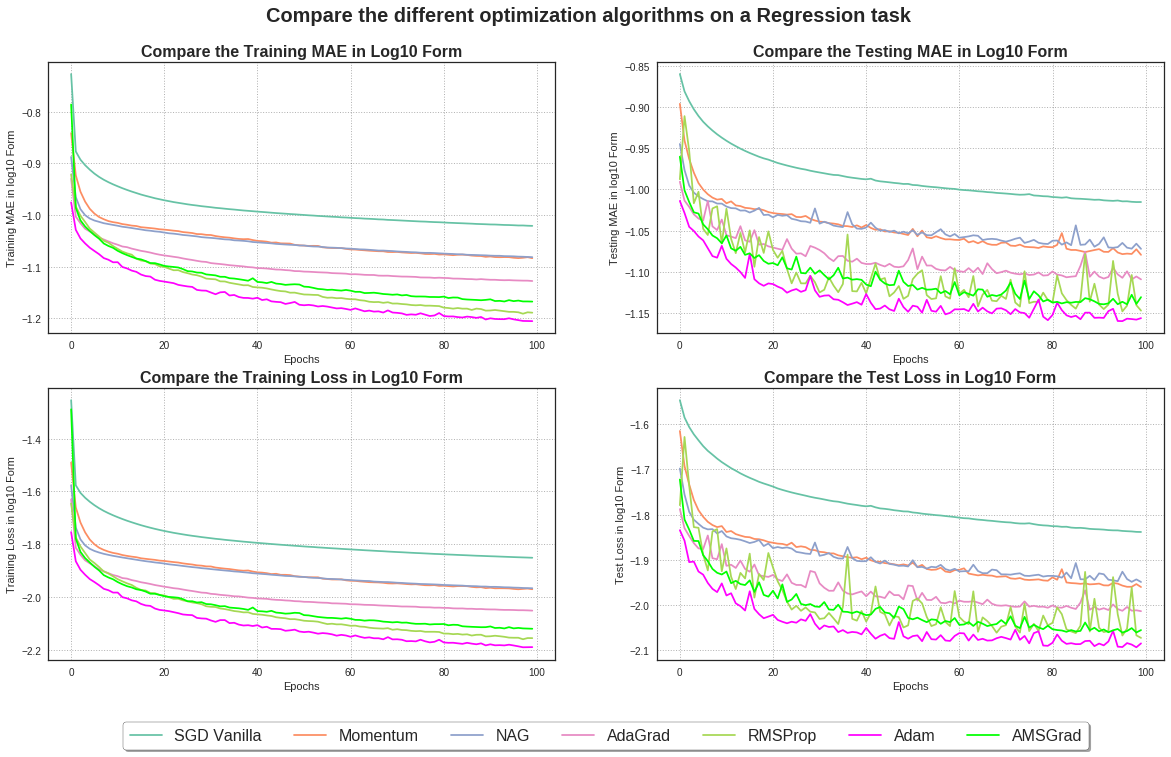

In [44]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,11))

ax1.plot(np.log10(model_1_history.history['mean_absolute_error']), color=colors[0],label='SGD Vanilla')
ax1.plot(np.log10(model_2_history.history['mean_absolute_error']), color=colors[1],label='Momentum')
ax1.plot(np.log10(model_3_history.history['mean_absolute_error']), color=colors[2],label='NAG')
ax1.plot(np.log10(model_4_history.history['mean_absolute_error']), color=colors[3],label='AdaGrad')
ax1.plot(np.log10(model_5_history.history['mean_absolute_error']), color=colors[4],label='RMSProp')
ax1.plot(np.log10(model_6_history.history['mean_absolute_error']), color='fuchsia',label='Adam')
ax1.plot(np.log10(model_7_history.history['mean_absolute_error']), color='lime',label='AMSGrad')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training MAE in log10 Form')
#ax1.set_ylim(-1.2,-0.9)
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training MAE in Log10 Form',fontsize=16, fontweight='bold')

ax2.plot(np.log10(model_1_history.history['val_mean_absolute_error']),color=colors[0],label='SGD Vanilla')
ax2.plot(np.log10(model_2_history.history['val_mean_absolute_error']),color=colors[1],label='Momentum')
ax2.plot(np.log10(model_3_history.history['val_mean_absolute_error']),color=colors[2],label='NAG')
ax2.plot(np.log10(model_4_history.history['val_mean_absolute_error']),color=colors[3],label='AdaGrad')
ax2.plot(np.log10(model_5_history.history['val_mean_absolute_error']),color=colors[4],label='RMSProp')
ax2.plot(np.log10(model_6_history.history['val_mean_absolute_error']),color='fuchsia',label='Adam')
ax2.plot(np.log10(model_7_history.history['val_mean_absolute_error']),color='lime',label='AMSGrad')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Testing MAE in log10 Form')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Testing MAE in Log10 Form',fontsize=16, fontweight='bold')


ax3.plot(np.log10(model_1_history.history['loss']),color=colors[0],label='SGD Vanilla')
ax3.plot(np.log10(model_2_history.history['loss']),color=colors[1],label='Momentum')
ax3.plot(np.log10(model_3_history.history['loss']),color=colors[2],label='NAG')
ax3.plot(np.log10(model_4_history.history['loss']),color=colors[3],label='AdaGrad')
ax3.plot(np.log10(model_5_history.history['loss']),color=colors[4],label='RMSProp')
ax3.plot(np.log10(model_6_history.history['loss']),color='fuchsia',label='Adam')
ax3.plot(np.log10(model_7_history.history['loss']),color='lime',label='AMSGrad')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss in log10 Form')
#ax3.set_ylim(-2.2,-1.6)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss in Log10 Form',fontsize=16, fontweight='bold')

ax4.plot(np.log10(model_1_history.history['val_loss']),color=colors[0],label='SGD Vanilla')
ax4.plot(np.log10(model_2_history.history['val_loss']),color=colors[1],label='Momentum')
ax4.plot(np.log10(model_3_history.history['val_loss']),color=colors[2],label='NAG')
ax4.plot(np.log10(model_4_history.history['val_loss']),color=colors[3],label='AdaGrad')
ax4.plot(np.log10(model_5_history.history['val_loss']),color=colors[4],label='RMSProp')
ax4.plot(np.log10(model_6_history.history['val_loss']),color='fuchsia',label='Adam')
ax4.plot(np.log10(model_7_history.history['val_loss']),color='lime',label='AMSGrad')

ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss in log10 Form')
#ax4.set_ylim(0.0025,0.02)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss in Log10 Form',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.2),
          ncol=7, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=16)


fig.suptitle('Compare the different optimization algorithms on a Regression task',fontsize=20, fontweight='bold',y=0.95)
plt.show()